## Article Analysis using NLP from 'timesofindia' :
- Find out what words were most mentioned in the targetted article using NLP?
- And also try to figure out what this article is about?

link:
- https://timesofindia.indiatimes.com/home/education/news/future-careers-2021-data-science-and-how-it-changes-everything/articleshow/81149878.cms

#### Technical aspects:
- Need to scrap the data from the url (need only the article content)
- Once the content is retrieved then use NLP techniques to get the insights from the text part

In [1]:
#import necessary packages for web scrapping:
import bs4 
import requests
from selenium import webdriver
import time
import pandas as pd
url = 'https://timesofindia.indiatimes.com/home/education/news/future-careers-2021-data-science-and-how-it-changes-everything/articleshow/81149878.cms'

In [2]:
import requests
res = requests.get(url)

In [3]:
soup = bs4.BeautifulSoup(res.text, 'html.parser') #there are many types of parser

In [5]:
#Get only the entire article content:
article = []
for word in soup.find_all('div', class_='section1'):
    article.append(word.text.strip())
article

['Just ten years ago, jobs like Social Media Manager or Influencer did not exist. Today, they are not only sought after but also here to stay. The rate of change and innovation in both technology and life now are indelibly intertwined. Planning for a career that will be relevant in the future looks almost impossible – but experts in education have already pinpointed multiple trends that will be even more relevant tomorrow.   Data science: prospects as huge as the data we generate  Data is essential to our lives even now. Even using an app to plan your commute and be on time is wholly dependent on data. During Covid-19, data helped vaccine testing progress quickly, allowing scientists and doctors to create a preventative to help the world get back to normal.   The IT revolution, social media, and the digitisation of our world have led to the creation of reams and reams of information, known as Big Data. Data science is set to be integral to our lives even in the future in the following 

#### Now Apply NLP techniques to conclude about this article: The article is about what topic/person/things etc?

##### Data Pre-processing:
###### 1. Tokenization: used the function word_tokenizer() to split sentences into words

In [20]:
sen = ''
for i in article:
    sen = sen+i

In [21]:
import nltk
from nltk.tokenize import word_tokenize
tokens = word_tokenize(sen)

In [35]:
tokens[:20]

['Just',
 'ten',
 'years',
 'ago',
 ',',
 'jobs',
 'like',
 'Social',
 'Media',
 'Manager',
 'or',
 'Influencer',
 'did',
 'not',
 'exist',
 '.',
 'Today',
 ',',
 'they',
 'are']

In [47]:
#convert the above list into a string for further pre-processing steps:
text = ' '
text = text.join(tokens)
print(text[:40])
print(len(text))

Just ten years ago , jobs like Social Me
4480


###### 2. Punctuations and Stop words removal:

In [37]:
# Import the stop word list
from nltk.corpus import stopwords
nltk.download('stopwords')

#print the 10 stop words:
print(stopwords.words("english")[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91842\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import nltk
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
punct =string.punctuation

clean_data =[]
for word in nltk.word_tokenize(text):
    if word not in punct:
        if word not in stop_words:
            clean_data.append(word)
            
clean_data

['Just',
 'ten',
 'years',
 'ago',
 'jobs',
 'like',
 'Social',
 'Media',
 'Manager',
 'Influencer',
 'exist',
 'Today',
 'sought',
 'also',
 'stay',
 'The',
 'rate',
 'change',
 'innovation',
 'technology',
 'life',
 'indelibly',
 'intertwined',
 'Planning',
 'career',
 'relevant',
 'future',
 'looks',
 'almost',
 'impossible',
 '–',
 'experts',
 'education',
 'already',
 'pinpointed',
 'multiple',
 'trends',
 'even',
 'relevant',
 'tomorrow',
 'Data',
 'science',
 'prospects',
 'huge',
 'data',
 'generate',
 'Data',
 'essential',
 'lives',
 'even',
 'Even',
 'using',
 'app',
 'plan',
 'commute',
 'time',
 'wholly',
 'dependent',
 'data',
 'During',
 'Covid-19',
 'data',
 'helped',
 'vaccine',
 'testing',
 'progress',
 'quickly',
 'allowing',
 'scientists',
 'doctors',
 'create',
 'preventative',
 'help',
 'world',
 'get',
 'back',
 'normal',
 'The',
 'IT',
 'revolution',
 'social',
 'media',
 'digitisation',
 'world',
 'led',
 'creation',
 'reams',
 'reams',
 'information',
 'known',

In [42]:
len(clean_data)

442

- Note that after removing the punctuations and stop words the length of the string is now reduced to 442 from 4480

###### Let's see the most cited/occured words of this article: generated a word cloud, to obtain an intuitive visualization of the most used words in the article according to their sizes

In [1]:
#!pip install WordCloud

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

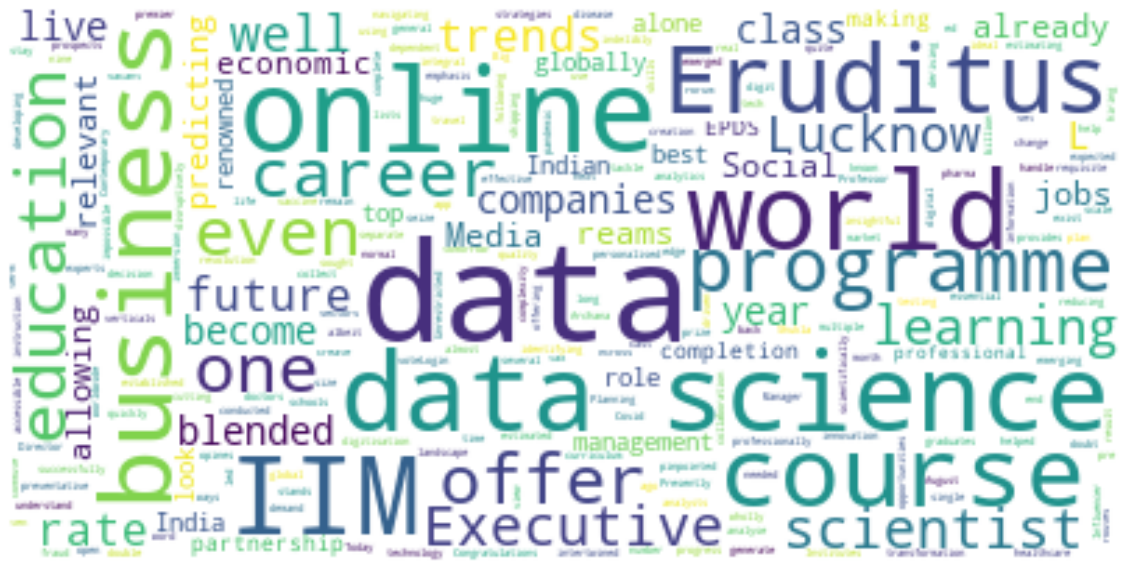

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
wc = WordCloud(max_font_size=50, max_words=500, background_color='white')
wordcloud_jan = wc.generate_from_text(' '.join(clean_data))
plt.imshow(wordcloud_jan, interpolation='bilinear')
plt.axis('off')
plt.show()

#### That way, we can quickly see which words have appeared mostly in this article such as - data, world, online, data science, course, education etc